# Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data.csv', delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Play around data.

In [ ]:
datac = data.copy()

In [ ]:
text_columns = datac.select_dtypes(include=['object'])

for i in text_columns.columns:
  print(f"...........{i}.........")
  print(datac.groupby(str(i)).count()["age"])
  print("..................")

...........job.........
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: age, dtype: int64
..................
...........marital.........
marital
divorced     5207
married     27214
single      12790
Name: age, dtype: int64
..................
...........education.........
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: age, dtype: int64
..................
...........default.........
default
no     44396
yes      815
Name: age, dtype: int64
..................
...........housing.........
housing
no     20081
yes    25130
Name: age, dtype: int64
..................
...........loan.........
loan
no     37967
yes     7244
Name: age, dtype: int64
..................
...........contact.........
contact
cellular     29285
telephone

default, housing, loan and y values can be replaced with 0,1

### Assumption #1: The Response Variable is Binary

In [ ]:
datac.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
datac.groupby("y").count()["age"]

,age
y,
0,39922
1,5289


In [ ]:
datac['y'] = datac['y'].replace({'yes': 1, 'no': 0})


Good! responce variable has to classes **no** and **yes**. But there is a class imbalce.

### Assumption #2: The Observations are Independent

### Assumption #3: There is No Multicollinearity Among Explanatory Variables

In [ ]:
# VIF

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

num_datac = datac.select_dtypes(include=np.number)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = num_datac.columns
vif["VIF"] = [variance_inflation_factor(num_datac.values, i) for i in range(len(num_datac.columns))]

print(vif)


    Feature       VIF
0       age  5.004244
1   balance  1.215229
2       day  3.985574
3  duration  2.256165
4  campaign  1.827502
5     pdays  1.461271
6  previous  1.345668
7         y  1.366733


Its ok, Multicollinear is Max 5 and its moderate.

### Assumption #4: There are No Extreme Outliers

In [ ]:
num_datac = datac.select_dtypes(include=np.number)
num_datac.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


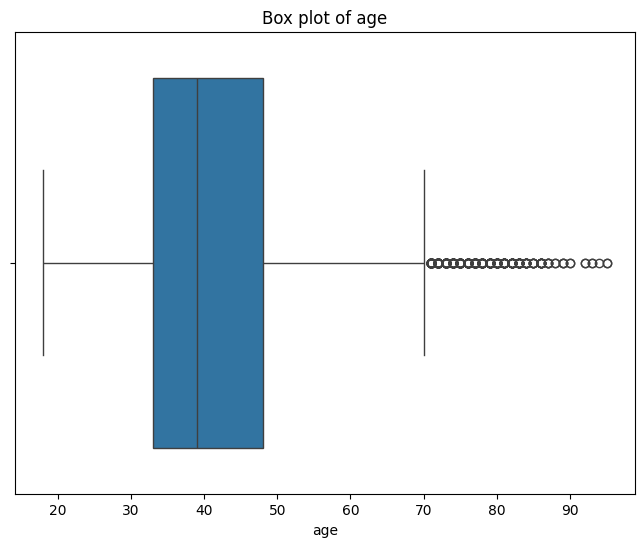

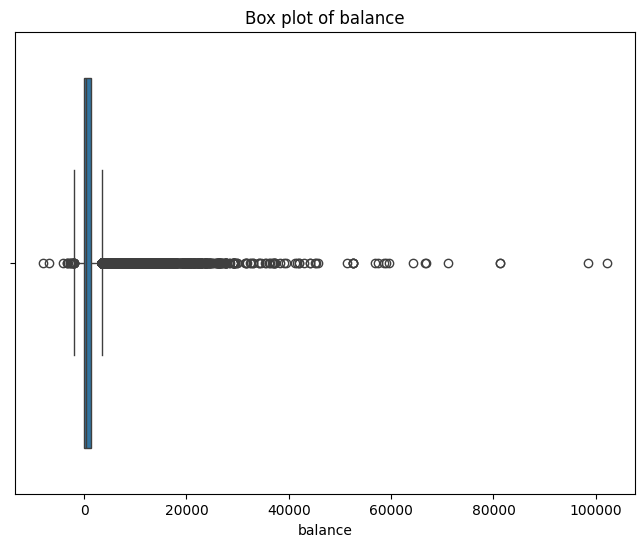

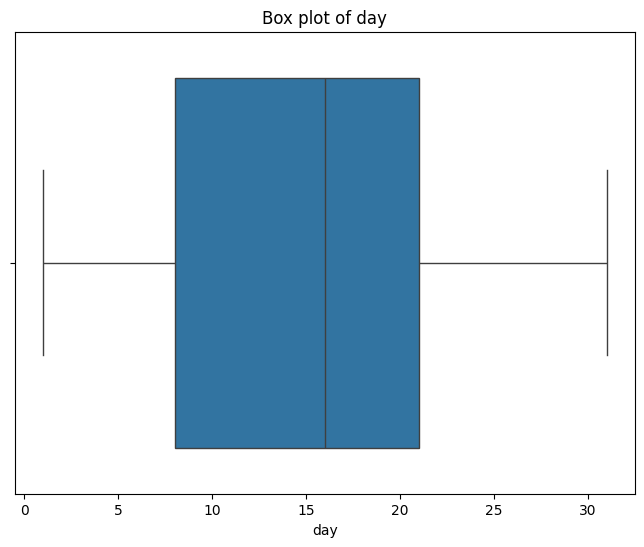

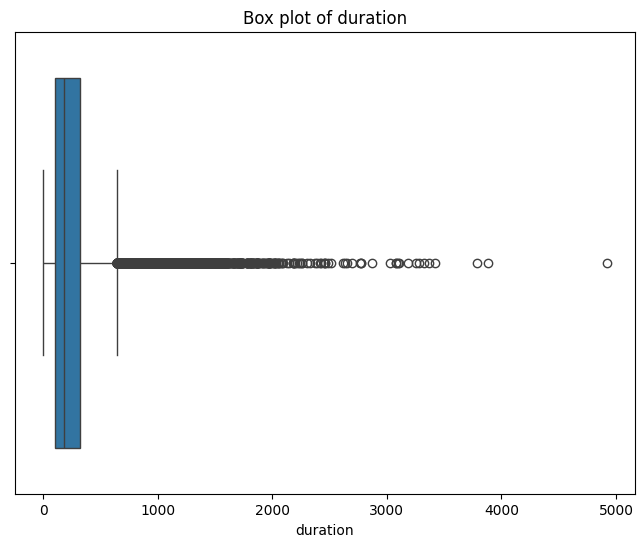

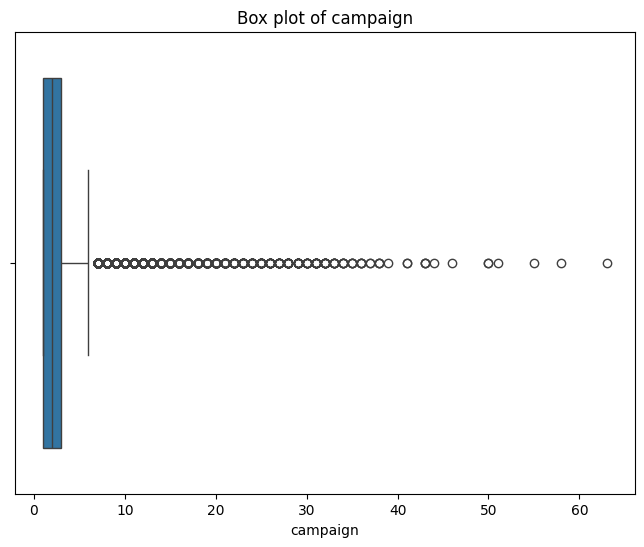

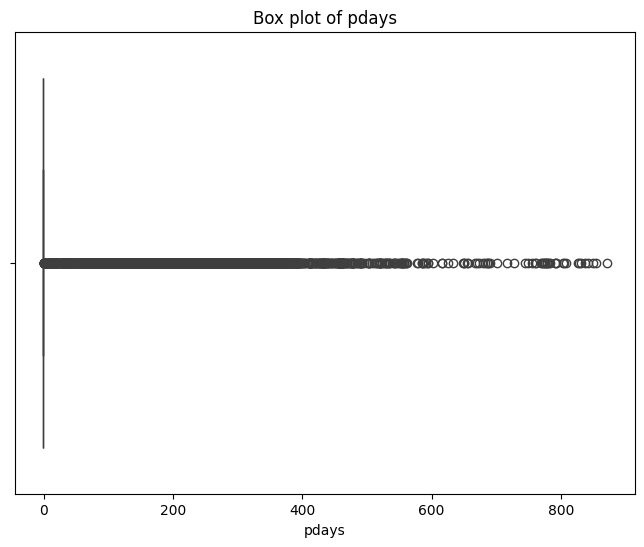

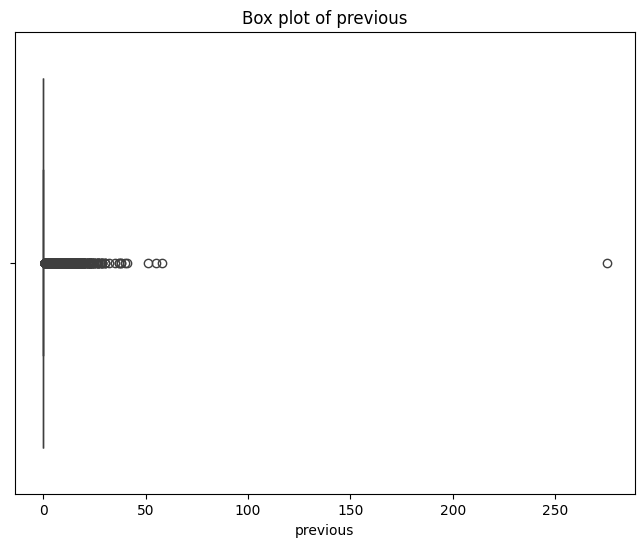

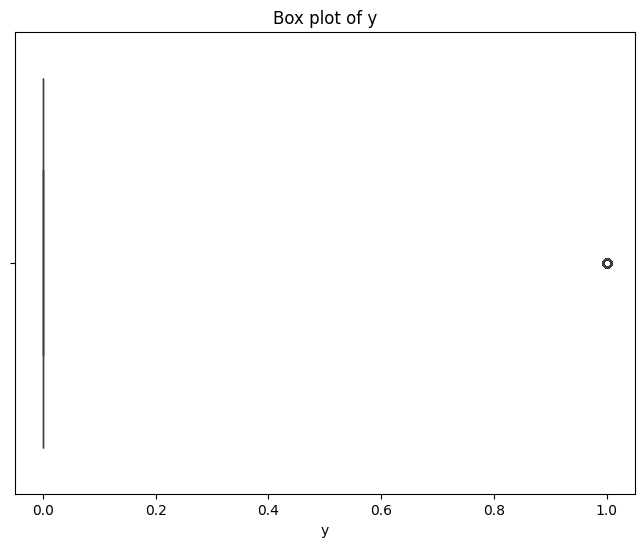

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for column in num_datac.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=num_datac[column])
  plt.title(f"Box plot of {column}")
  plt.show()


In [ ]:
# prompt: find cooks distance for num_datac dataframe

import statsmodels.formula.api as sm

# Choose a column from num_datac to be the dependent variable
# Here, we are setting 'balance' as the dependent variable.
dependent_variable = 'y'

# Create the formula string (excluding the dependent variable from the independent variables)
formula = dependent_variable + ' ~ ' + ' + '.join(num_datac.drop(dependent_variable, axis=1).columns)

# Fit the OLS model
model = sm.ols(formula, data=num_datac).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Add Cook's distance to the dataframe
num_datac['cooks_distance'] = cooks_distance

# Print the results
print(num_datac[['cooks_distance']])

# You can further analyze the results to identify influential data points
# based on a threshold for Cook's distance.

       cooks_distance
0        2.919855e-06
1        3.314024e-07
2        9.031770e-09
3        1.366792e-07
4        5.834788e-07
...               ...
45206    9.588751e-05
45207    1.916813e-04
45208    1.150769e-04
45209    8.090472e-06
45210    6.206278e-05

[45211 rows x 1 columns]


Influential Data Points:
       age  balance  day  duration  campaign  pdays  previous  y  \
37      53       -3    5      1666         1     -1         0  0   
43      54      529    5      1492         1     -1         0  0   
59      46      179    5      1778         1     -1         0  0   
83      59     2343    5      1042         1     -1         0  1   
129     55     2476    5       579         1     -1         0  1   
...    ...      ...  ...       ...       ...    ...       ... ..   
45203   23      113   17       266         1     -1         0  1   
45204   73     2850   17       300         1     40         8  1   
45206   51      825   17       977         3     -1         0  1   
45207   71     1729   17       456         2     -1         0  1   
45208   72     5715   17      1127         5    184         3  1   

       cooks_distance  
37           0.000707  
43           0.000455  
59           0.000886  
83           0.000116  
129          0.000105  
...           

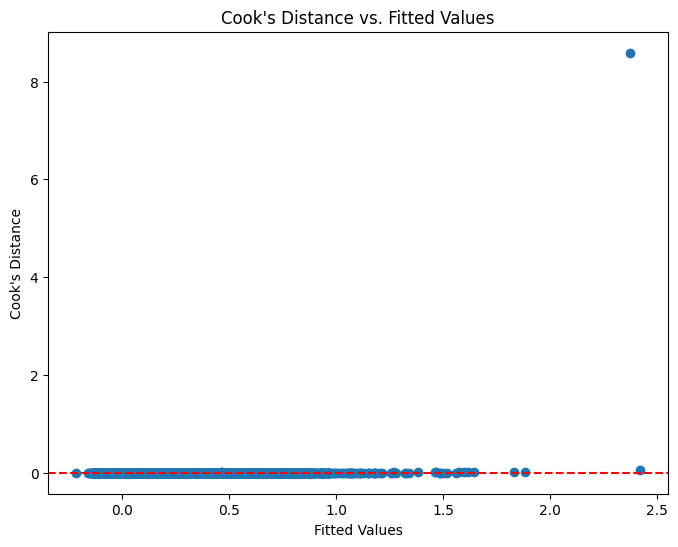

In [ ]:
# Define a threshold for Cook's distance (e.g., 4/n, where n is the number of observations)
threshold = 4 / len(num_datac)

# Identify influential data points based on the threshold
influential_data_points = num_datac[num_datac['cooks_distance'] > threshold]

# Print the influential data points
print("Influential Data Points:")
print(influential_data_points)

# You can also visualize the influential data points using a scatter plot
# with Cook's distance on the y-axis and the fitted values on the x-axis.
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, num_datac['cooks_distance'])
plt.xlabel("Fitted Values")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance vs. Fitted Values")
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()


Removing influential points.

In [ ]:
# Remove influential data points from the dataframe
num_datac_cleaned = num_datac[num_datac['cooks_distance'] <= threshold]

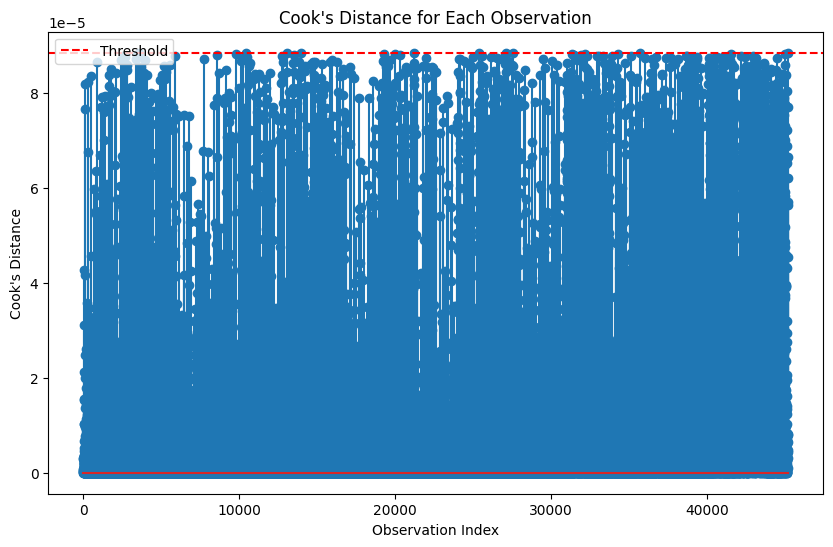

In [ ]:
plt.figure(figsize=(10, 6))
plt.stem(num_datac_cleaned.index, num_datac_cleaned['cooks_distance'])
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for Each Observation')
plt.legend()
plt.show()

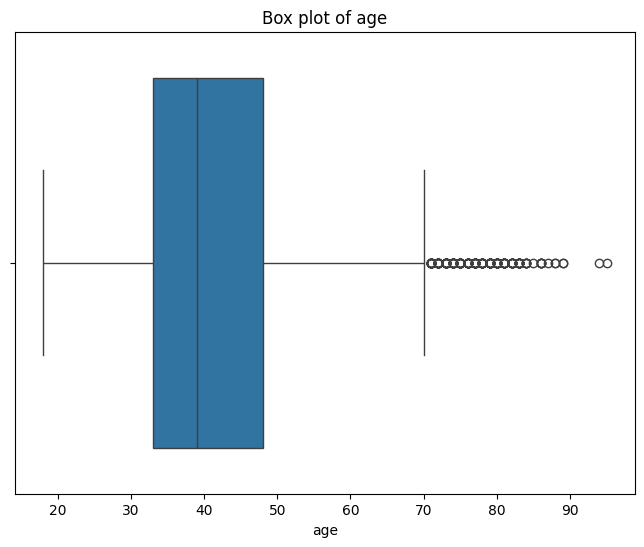

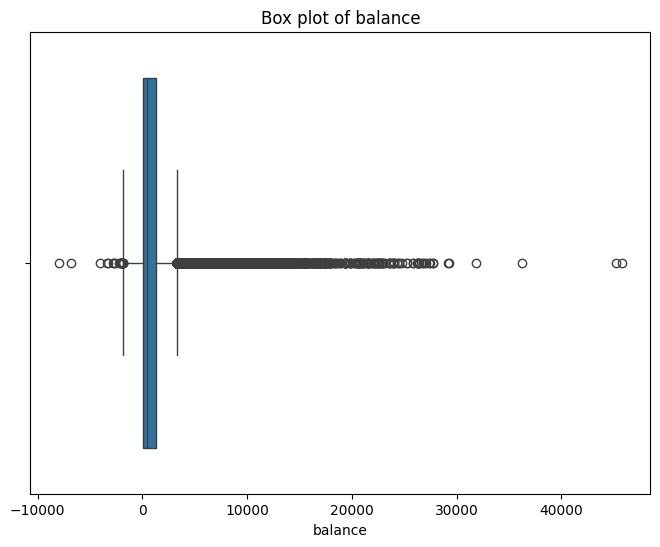

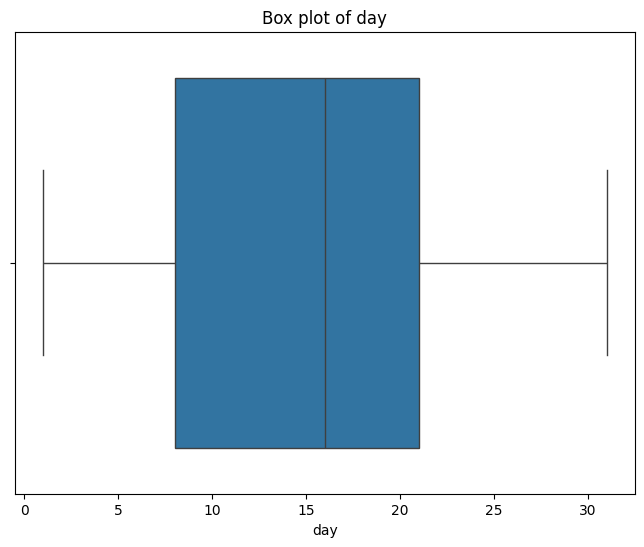

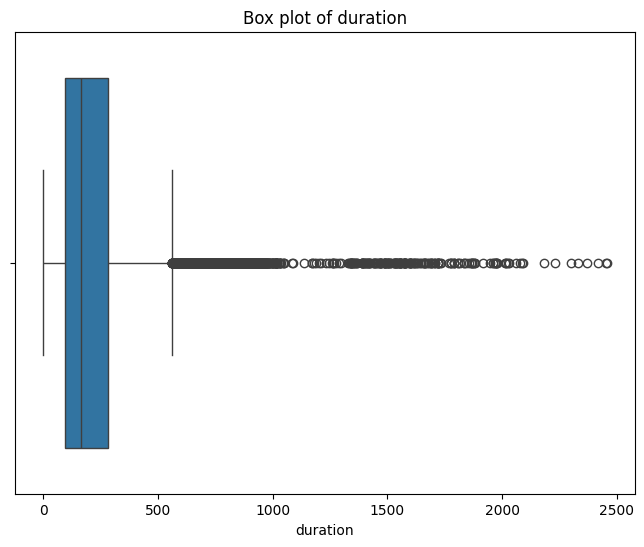

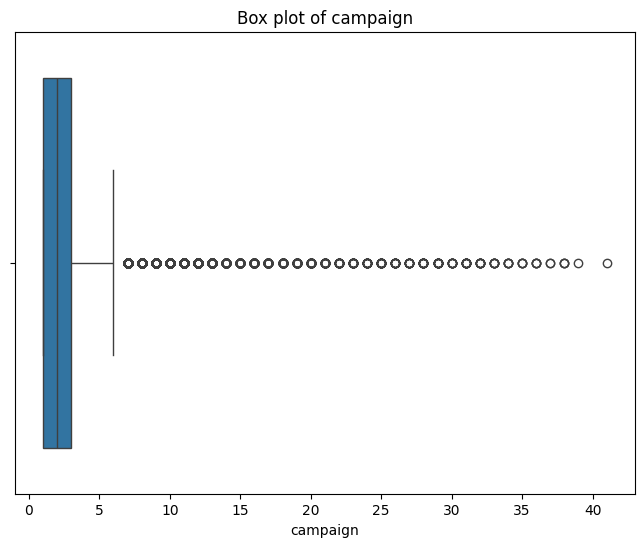

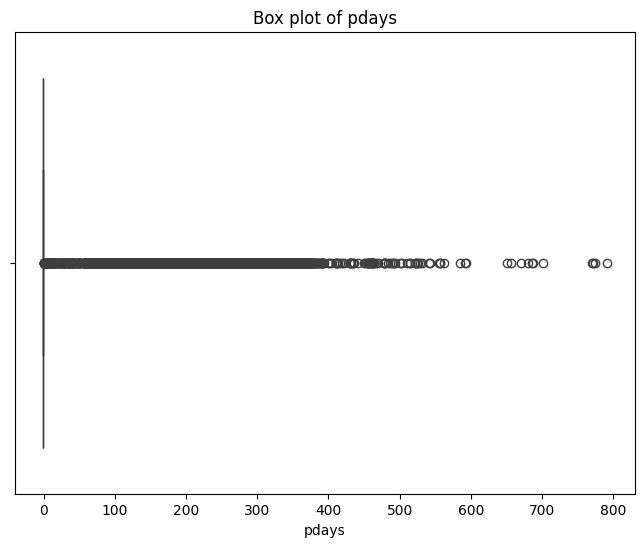

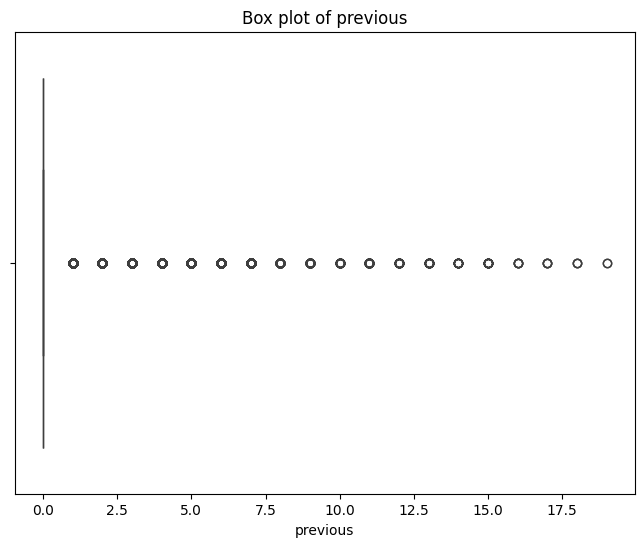

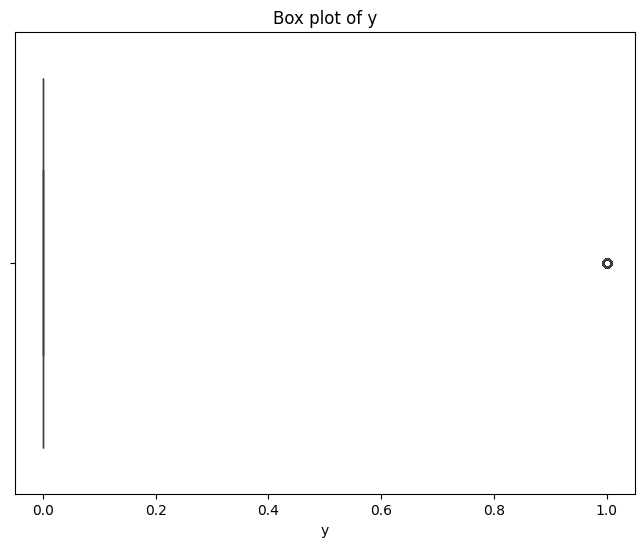

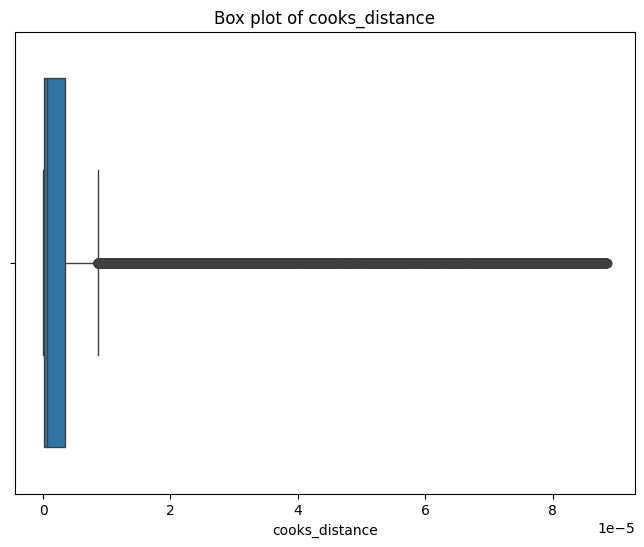

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for column in num_datac_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=num_datac_cleaned[column])
  plt.title(f"Box plot of {column}")
  plt.show()

Well, its amazing.
And we almost done ass we have a significant sample size.

# Spplition

In [ ]:
data_new = data.copy()

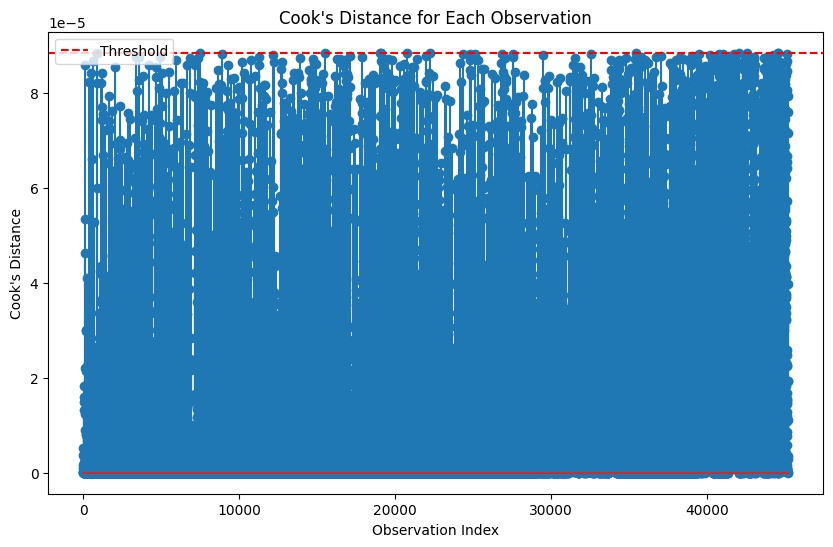

In [ ]:
# Choose a column from data_new to be the dependent variable
# Here, we are setting 'balance' as the dependent variable.
dependent_variable = 'y'

data_new["y"] = data_new["y"].replace({'yes': 1, 'no': 0})

# Create the formula string (excluding the dependent variable from the independent variables)
formula = dependent_variable + ' ~ ' + ' + '.join(data_new.drop(dependent_variable, axis=1).columns)

# Fit the OLS model
model = sm.ols(formula, data=data_new).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Add Cook's distance to the dataframe
data_new['cooks_distance'] = cooks_distance

# Remove influential data points from the dataframe
data_new = data_new[data_new['cooks_distance'] <= threshold]

plt.figure(figsize=(10, 6))
plt.stem(data_new.index, data_new['cooks_distance'])
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for Each Observation')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = data_new.drop('y', axis=1)
y = data_new['y']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (28231, 17)
X_test shape: (12100, 17)
y_train shape: (28231,)
y_test shape: (12100,)


# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(include=['number']).columns
numeric_transformer = StandardScaler()

def transform_0_1(X):
  return X.replace({'yes': 1, 'no': 0})

transform_0_1 = FunctionTransformer(transform_0_1)

processing = ColumnTransformer(
    transformers = [

    ('default', transform_0_1, ['default']),
    ('housing', transform_0_1, ['housing']),
    ('loan', transform_0_1, ['loan']),
    ('onehot', OneHotEncoder(), ['job', 'marital', 'education', 'contact', 'month', 'poutcome']),
    ('num', numeric_transformer, numeric_features)
    ],
       remainder='passthrough'
                               )

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline with the preprocessing steps and the logistic regression model
pipeline = Pipeline([
    ('processing', processing),  # Apply the preprocessing steps
    ('logistic_regression', LogisticRegression())  # Fit a logistic regression model
])

# Fitting

In [ ]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Results

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9915702479338843
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11617
           1       0.85      0.95      0.90       483

    accuracy                           0.99     12100
   macro avg       0.93      0.97      0.95     12100
weighted avg       0.99      0.99      0.99     12100



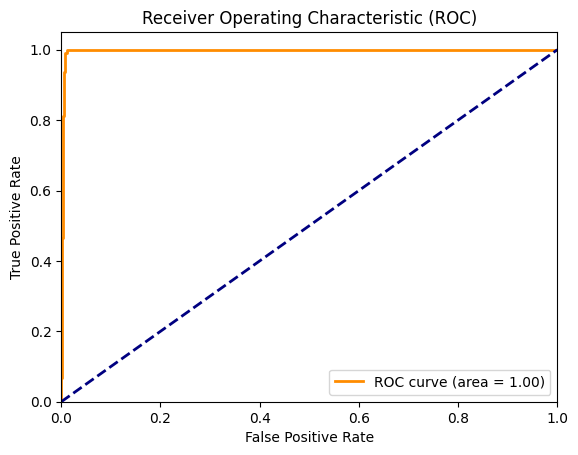

AUC Score: 0.9969727380680594


In [ ]:
# prompt: Plot Roc and AUc

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC using roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")
